<a href="https://colab.research.google.com/github/Aravindh-sreeni/exit_exam/blob/main/netflix_titles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [24]:
import pandas as pd # Data manipulation and analysis (DataFrames)
import numpy as np # Numerical computations and array operations
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization

In [2]:
#read xlsx file that contains 5 files
netflix_director= pd.read_excel('/content/partpdf_1758712161434_netflix_titles.xlsx', sheet_name=1)
netflix_director.head()



,director,show_id
0,Richard Finn,81145628
1,Fernando Lebrija,80125979
2,Gabe Ibáñez,70304989
3,Rodrigo Toro,80164077
4,Henrik Ruben Genz,70304990


In [3]:
netflix_country = pd.read_excel('/content/partpdf_1758712161434_netflix_titles.xlsx', sheet_name=2)
netflix_country.head()


,country,show_id
0,Germany,80016401
1,South Africa,80182274
2,United States,80182274
3,United States,81145628
4,United Kingdom,80117401


In [4]:
netflix_cast=pd.read_excel('/content/partpdf_1758712161434_netflix_titles.xlsx', sheet_name=3)
netflix_cast.head()

,cast,show_id
0,Alan Marriott,81145628
1,Jandino Asporaat,80117401
2,Peter Cullen,70234439
3,Will Friedle,80058654
4,Nesta Cooper,80125979


In [5]:
netflix_show=pd.read_excel('/content/partpdf_1758712161434_netflix_titles.xlsx', sheet_name=4)
netflix_show.head()

,listed_in,show_id
0,Children & Family Movies,81145628
1,Stand-Up Comedy,80117401
2,Kids' TV,70234439
3,Kids' TV,80058654
4,Comedies,80125979


In [6]:
netflix_title = pd.read_excel('/content/partpdf_1758712161434_netflix_titles.xlsx', sheet_name=0)
netflix_title.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0


convert to single master table


In [7]:
#merge them into a single master DataFrame using show_id as the key.
netflix_master = pd.merge(netflix_title, netflix_director, on='show_id')
netflix_master = pd.merge(netflix_master, netflix_country, on='show_id')
netflix_master = pd.merge(netflix_master, netflix_cast, on='show_id')
netflix_master = pd.merge(netflix_master, netflix_show, on='show_id')
netflix_master.head()


,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Children & Family Movies
1,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Comedies
2,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Children & Family Movies
3,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Comedies
4,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Lee Tockar,Children & Family Movies


I USED RIGHT JOIN FOR CREATING THE MASTER TABLE BECAUSE I THINK IT IS THE CORRECT WAY TO CREATE THE TABLE BECAUSE THE DIRECTOR,COUNTRY,CAST,AND LISTED_IN SHOWS AFTER THE TITLE WHICH IS AN  APPROPRIATE MANNER BEACAUSE THE TITLE IS THE IMPORTANT AND MOT VALID REST ALL ARE IT RELATIONS EHICH ARE COMING AFTER THE TITLE

In [8]:
netflix_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98206 entries, 0 to 98205
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  95006 non-null  object 
 1   duration_seasons  3200 non-null   object 
 2   type              98206 non-null  object 
 3   title             98206 non-null  object 
 4   date_added        98206 non-null  object 
 5   release_year      98206 non-null  float64
 6   rating            98196 non-null  object 
 7   description       98206 non-null  object 
 8   show_id           98206 non-null  float64
 9   director          98206 non-null  object 
 10  country           98206 non-null  object 
 11  cast              98206 non-null  object 
 12  listed_in         98206 non-null  object 
dtypes: float64(2), object(11)
memory usage: 9.7+ MB


missing values

In [9]:
#missing values
netflix_master.isnull().sum()

,0
duration_minutes,3200
duration_seasons,95006
type,0
title,0
date_added,0
release_year,0
rating,10
description,0
show_id,0
director,0


In [10]:
# Convert date_added to a proper datetime format and extract the year_added for trend analysis.
netflix_master['date_added'] = pd.to_datetime(netflix_master['date_added'])
netflix_master['year_added'] = netflix_master['date_added'].dt.year
netflix_master.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,year_added
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Children & Family Movies,2019
1,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Comedies,2019
2,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Children & Family Movies,2019
3,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Comedies,2019
4,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Lee Tockar,Children & Family Movies,2019


In [19]:
#drop duration minutes,duration_seasons,rating
netflix_master.drop(['duration_minutes', 'duration_seasons', 'rating'], axis=1, inplace=True)
netflix_master.head()




,type,title,date_added,release_year,description,show_id,director,country,cast,listed_in,year_added
0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Children & Family Movies,2019
1,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Comedies,2019
2,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Children & Family Movies,2019
3,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Comedies,2019
4,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Lee Tockar,Children & Family Movies,2019


I CHOOSED DROPING METHOD BEACAUSE THESE COLUMNS WHWERE IRRELEVANT COLUMNS THAT CONSIST OF INFORATION THAT MUST NOT BE NEEDED IN THE FURTHER PROCESS

In [21]:

netflix_master = netflix_master.assign(cast=netflix_master['cast'].str.split(', ')).explode('cast')
netflix_master

,type,title,date_added,release_year,description,show_id,director,country,cast,listed_in,year_added
0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Children & Family Movies,2019
1,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Comedies,2019
2,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Children & Family Movies,2019
3,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Comedies,2019
4,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Lee Tockar,Children & Family Movies,2019
...,...,...,...,...,...,...,...,...,...,...,...
98201,TV Show,Leyla and Mecnun,2017-04-15,2014.0,Destiny brings Mecnun and Leyla together as ne...,80126599.0,Onur Ünlü,Turkey,Ege Tanman,Romantic TV Shows,2017
98202,TV Show,Leyla and Mecnun,2017-04-15,2014.0,Destiny brings Mecnun and Leyla together as ne...,80126599.0,Onur Ünlü,Turkey,Ege Tanman,TV Comedies,2017
98203,TV Show,Leyla and Mecnun,2017-04-15,2014.0,Destiny brings Mecnun and Leyla together as ne...,80126599.0,Onur Ünlü,Turkey,İştar Gökseven,International TV Shows,2017
98204,TV Show,Leyla and Mecnun,2017-04-15,2014.0,Destiny brings Mecnun and Leyla together as ne...,80126599.0,Onur Ünlü,Turkey,İştar Gökseven,Romantic TV Shows,2017


FROM THIS WE CAN GET THE INSIGHTS THAT WHICH ACTOR ACTED IN MOST OF THE SHOWS WHICH WAS FOUN THAT ALFRED MOLLANA AND THE MOST NO OF SHOWS LISTED WAS UNDER THE CATEGORY OF DRAMA. SUCH INSIGHTS CAN BE GOT SO MAKING ALFRED MOLLANA WOULD BE A PERFECT CAST SO THE BUSSINESSMAN CAN BUY HIM FOR HIS EXPERIENCE AND TALENT.THE PRODUCERS SHOULS TAKE COMEDIES ,DRAMAS ,SHOWS MORE THAN MOVIES THAT WOULD BE AN APPROPRIATE BUSSINESS DESICION

EDA

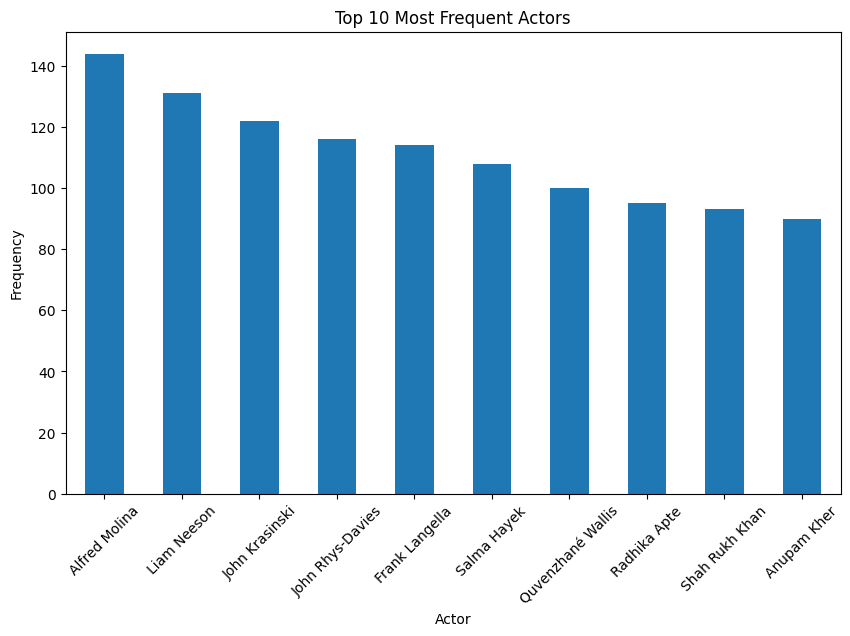

In [26]:
#create a bar chart showing the Top 10 most frequent actors
actor_counts = netflix_master['cast'].value_counts().head(10)
plt.figure(figsize=(10, 6))
actor_counts.plot(kind='bar')
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Actor')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


THESE ARE THE TOP MOST ACTORS FROM WHICH WE CAN GET THAT ALFRED MOLINA IS ONE THE FREQUENT ACTORS IN THE INDUSTRY TAKING A FILM WITH ALFRED MOLINA SHOULD GET IN A GREAT OUTCOME BECAUSE WITH SUCH AN EXPERIENCED ACTOR IF THE FILM EVEN GOES TO BE A BAD RATING PROPLE WOULD JUST COME TO WATCH HIS SERIES OR MOVIES.

In [27]:
#Saving netflix_master to a CSV file
netflix_master.to_csv('netflix_master.csv', index=False)


